In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import *

In [2]:
N=[0,(0,1),(0,2),(0,3),(0,4),(0,5),(0,1,2),(0,1,3),(0,1,4),(0,1,5),(0,2,3),(0,2,4),(0,2,5),(0,3,4),(0,3,5),(0,4,5) \
   ,(0,1,2,3),(0,1,2,4),(0,1,2,5),(0,1,3,4),(0,1,3,5),(0,1,4,5),(0,2,3,4),(0,2,3,5),(0,2,4,5),(0,3,4,5) \
   ,(0,1,2,3,4),(0,1,2,3,5),(0,1,2,4,5),(0,1,3,4,5),(0,2,3,4,5),(0,1,2,3,4,5),6]
len(N)

33

In [3]:
d={1:[6,9],2:[4,5],3:[13,20],4:[7,11],5:[11,17]}

In [4]:
B=[(0,(0,1)),(0,(0,2)),(0,(0,3)),(0,(0,4)),(0,(0,5))]
for list1 in N:
    for list2 in N:
        if list1 != 0 and list1 != 6 and list2 != 0 and list2 != 6 and list1!= list2 and len(list1)+1==len(list2):
            c=0
            for i in range(len(list1)):
                if list1[i]==list2[i]:
                        c+=1          
            if c==len(list1):
                B.append((list1,list2))
        if list1 != 0 and list1 != 6 and list2==6 and list1!= list2:
            B.append((list1,list2))
A=[]
for i in B:
    if i[1] !=6:
        suma=0
        for j in i[1]:
            if j!=0 and j!=6:
                suma+=d[j][0]
        if suma<=34:
            A.append(i)

for i in A.copy():
    A.append((i[1],6))
A

[(0, (0, 1)),
 (0, (0, 2)),
 (0, (0, 3)),
 (0, (0, 4)),
 (0, (0, 5)),
 ((0, 1), (0, 1, 2)),
 ((0, 1), (0, 1, 3)),
 ((0, 1), (0, 1, 4)),
 ((0, 1), (0, 1, 5)),
 ((0, 2), (0, 2, 3)),
 ((0, 2), (0, 2, 4)),
 ((0, 2), (0, 2, 5)),
 ((0, 3), (0, 3, 4)),
 ((0, 3), (0, 3, 5)),
 ((0, 4), (0, 4, 5)),
 ((0, 1, 2), (0, 1, 2, 3)),
 ((0, 1, 2), (0, 1, 2, 4)),
 ((0, 1, 2), (0, 1, 2, 5)),
 ((0, 1, 3), (0, 1, 3, 4)),
 ((0, 1, 3), (0, 1, 3, 5)),
 ((0, 1, 4), (0, 1, 4, 5)),
 ((0, 2, 3), (0, 2, 3, 4)),
 ((0, 2, 3), (0, 2, 3, 5)),
 ((0, 2, 4), (0, 2, 4, 5)),
 ((0, 3, 4), (0, 3, 4, 5)),
 ((0, 1, 2, 3), (0, 1, 2, 3, 4)),
 ((0, 1, 2, 3), (0, 1, 2, 3, 5)),
 ((0, 1, 2, 4), (0, 1, 2, 4, 5)),
 ((0, 1), 6),
 ((0, 2), 6),
 ((0, 3), 6),
 ((0, 4), 6),
 ((0, 5), 6),
 ((0, 1, 2), 6),
 ((0, 1, 3), 6),
 ((0, 1, 4), 6),
 ((0, 1, 5), 6),
 ((0, 2, 3), 6),
 ((0, 2, 4), 6),
 ((0, 2, 5), 6),
 ((0, 3, 4), 6),
 ((0, 3, 5), 6),
 ((0, 4, 5), 6),
 ((0, 1, 2, 3), 6),
 ((0, 1, 2, 4), 6),
 ((0, 1, 2, 5), 6),
 ((0, 1, 3, 4), 6),
 ((0, 1,

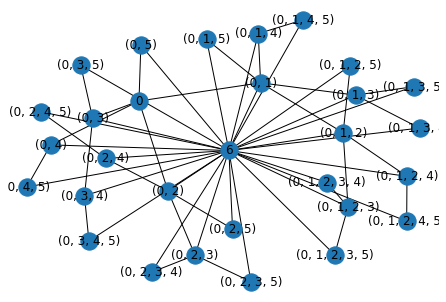

In [14]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_edges_from(A)
nx.draw(G, with_labels=True)

In [6]:
c={}
v={}
for i in A:
    if i[1]!=6:
        c[i]=d[i[1][-1]][0]
        v[i]=d[i[1][-1]][1]
    else:
        c[i]=0
        v[i]=0

In [7]:
model = Model('Taller 2')

Academic license - for non-commercial use only - expires 2021-11-17
Using license file C:\Users\nicod\gurobi.lic


In [8]:
x= model.addVars(A,vtype=GRB.CONTINUOUS,lb=0,ub=1,name='x')

In [9]:
p={}
for n in N:
    for i in A:
        if n not in p:
            p[n]={'In':[], 'Out':[]}
        if i[0]==n:
            p[n]['Out'].append(i)
        elif i[1]==n:
            p[n]['In'].append(i)           

In [10]:
con=0
for i in p:
    if i !=0 and i !=6:
        model.addConstr(quicksum(x[a] for a in p[i]['In']) - quicksum(x[b] for b in p[i]['Out']) == 0)
    elif i ==0:
        model.addConstr(quicksum(x[b] for b in p[i]['Out']) == 1)
    else:
        model.addConstr(quicksum(x[a] for a in p[i]['In']) == 1)

In [11]:
obj=quicksum(x[a]*v[a] for a in A)

In [12]:
model.setObjective(obj, GRB.MAXIMIZE)
model.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 33 rows, 56 columns and 112 nonzeros
Model fingerprint: 0xfdaebd24
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 28 rows and 49 columns
Presolve time: 0.02s
Presolved: 5 rows, 7 columns, 14 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.4000000e+01   6.000000e+00   0.000000e+00      0s
       3    5.1000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.04 seconds
Optimal objective  5.100000000e+01


In [13]:
con=0
costo=0
for i in A:
    if x[i].x ==1:
        con+=1
        costo+=x[i].x * c[i]
        print('Ruta ' + str(con)+': '+str(i) + ' con un costo de ' + str(c[i]) + ' y un VPN de ' +str(v[i]))

print('\nEl VPN final del proyecto es de ' + str(model.getObjective().getValue()) + ' y tiene un costo total de ' + str(costo))

Ruta 1: (0, (0, 1)) con un costo de 6 y un VPN de 9
Ruta 2: ((0, 1), (0, 1, 2)) con un costo de 4 y un VPN de 5
Ruta 3: ((0, 1, 2), (0, 1, 2, 3)) con un costo de 13 y un VPN de 20
Ruta 4: ((0, 1, 2, 3), (0, 1, 2, 3, 5)) con un costo de 11 y un VPN de 17
Ruta 5: ((0, 1, 2, 3, 5), 6) con un costo de 0 y un VPN de 0

El VPN final del proyecto es de 51.0 y tiene un costo total de 34.0
